In [177]:
import pandas as pd
import numpy as np
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use('seaborn')

%matplotlib inline


In [98]:
# Import the Sample worksheet with acquisition dates and initial cost basis:
portfolio_df = pd.read_excel('Sample stocks acquisition dates_costs1.xlsx')
portfolio_df.info

<bound method DataFrame.info of   Acquisition Date Ticker  Quantity  Unit Cost  Cost Basis Start of Year
0       2016-02-07   AAPL       125      65.40     8175.00    2020-12-31
1       2017-02-27    JNJ       100      81.90     8190.00    2020-12-31
2       2017-06-04    MCD       100      84.99     8499.00    2020-12-31
3       2018-12-14   MTCH       600      13.63     8178.00    2020-12-31
4       2019-01-14   NFLX        75     108.71     8153.25    2020-12-31
5       2016-08-14    WMT       125      68.30     8537.50    2020-12-31
6       2016-12-13     FB       150      53.32     7998.00    2020-12-31
7       2018-01-05   TWTR       225      36.38     8185.50    2020-12-31>

In [99]:
# Date Ranges for SP 500 and for all tickers
# Modify these date ranges each week.

# The below will pull back stock prices from 2010 until end date specified.
start_sp = datetime.datetime(2016, 1, 1)
end_sp = datetime.datetime(2021, 7, 23)

# This variable is used for YTD performance.
end_of_last_year = datetime.datetime(2020, 12, 31)

# These are separate if for some reason want different date range than SP.
stocks_start = datetime.datetime(2016, 1, 1)
stocks_end = datetime.datetime(2021, 7, 23)

In [100]:
sp500 = yf.download('^GSPC', start_sp, end_sp)

[*********************100%***********************]  1 of 1 completed


In [101]:
sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-31,2060.590088,2062.540039,2043.619995,2043.939941,2043.939941,2655330000
2016-01-04,2038.199951,2038.199951,1989.680054,2012.660034,2012.660034,4304880000
2016-01-05,2013.780029,2021.939941,2004.170044,2016.709961,2016.709961,3706620000
2016-01-06,2011.709961,2011.709961,1979.050049,1990.260010,1990.260010,4336660000
2016-01-07,1985.319946,1985.319946,1938.829956,1943.089966,1943.089966,5076590000


In [179]:
# Creating a dataframe with only the Adj Close column for analysis

sp_500_adj_close = sp500[['Adj Close']].reset_index()
sp_500_adj_close.head()

,Date,Adj Close
0,2015-12-31,2043.939941
1,2016-01-04,2012.660034
2,2016-01-05,2016.709961
3,2016-01-06,1990.260010
4,2016-01-07,1943.089966


In [103]:
# Adj Close for the EOY in 2020 in order to run comparisons versus stocks YTD performances.

sp_500_adj_close_start = sp_500_adj_close[sp_500_adj_close['Date']==end_of_last_year]
sp_500_adj_close_start

,Date,Adj Close
1259,2020-12-31,3756.070068


In [104]:
tickers = portfolio_df['Ticker'].unique()
tickers

array(['AAPL', 'JNJ', 'MCD', 'MTCH', 'NFLX', 'WMT', 'FB', 'TWTR'],
      dtype=object)

In [180]:
# Stock Comparison Code

def get(tickers, startdate, enddate):
    def data(ticker):
        return (yf.download(ticker, start=startdate, end=enddate))
    datas = map(data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))
               
all_data = get(tickers, stocks_start, stocks_end)
all_data.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Open       High        Low      Close  Adj Close  \
Ticker Date                                                                
AAPL   2015-12-31  26.752501  26.757500  26.205000  26.315001  24.302439   
       2016-01-04  25.652500  26.342501  25.500000  26.337500  24.323219   
       2016-01-05  26.437500  26.462500  25.602501  25.677500  23.713696   
       2016-01-06  25.139999  25.592501  24.967501  25.174999  23.249626   
       2016-01-07  24.670000  25.032499  24.107500  24.112499  22.268383   

                      Volume  
Ticker Date                   
AAPL   2015-12-31  163649200  
       2016-01-04  270597600  
       2016-01-05  223164000  
       2016-01-06  273829600  
       2016-01-07  324377600

In [181]:
adj_close = all_data['Adj Close'].reset_index()
adj_close.head()

,Ticker,Date,Adj Close
0,AAPL,2015-12-31,24.302439
1,AAPL,2016-01-04,24.323219
2,AAPL,2016-01-05,23.713696
3,AAPL,2016-01-06,23.249626
4,AAPL,2016-01-07,22.268383


In [107]:
# Grabbing the ticker close from the end of last year
adj_close_start = adj_close[adj_close["Date"] == end_of_last_year]
adj_close_start

,Ticker,Date,Adj Close
1259,AAPL,2020-12-31,132.267349
2658,JNJ,2020-12-31,155.434952
4057,MCD,2020-12-31,212.096405
5456,MTCH,2020-12-31,151.190002
6855,NFLX,2020-12-31,540.729980
8254,WMT,2020-12-31,142.989090
9653,FB,2020-12-31,273.160004
11052,TWTR,2020-12-31,54.150002


In [108]:
# Grab the latest stock close price
adj_close_latest = adj_close[adj_close["Date"] == "2021-07-22"]
adj_close_latest

,Ticker,Date,Adj Close
1398,AAPL,2021-07-22,146.800003
2797,JNJ,2021-07-22,169.979996
4196,MCD,2021-07-22,238.669998
5595,MTCH,2021-07-22,160.500000
6994,NFLX,2021-07-22,511.769989
8393,WMT,2021-07-22,141.270004
9792,FB,2021-07-22,351.190002
11191,TWTR,2021-07-22,69.570000


In [109]:
adj_close_latest.set_index(['Ticker'], inplace = True)
adj_close_latest

,Date,Adj Close
Ticker,,
AAPL,2021-07-22,146.800003
JNJ,2021-07-22,169.979996
MCD,2021-07-22,238.669998
MTCH,2021-07-22,160.500000
NFLX,2021-07-22,511.769989
WMT,2021-07-22,141.270004
FB,2021-07-22,351.190002
TWTR,2021-07-22,69.570000


In [110]:
portfolio_df.set_index(['Ticker'], inplace=True)
portfolio_df

,Acquisition Date,Quantity,Unit Cost,Cost Basis,Start of Year
Ticker,,,,,
AAPL,2016-02-07,125,65.40,8175.00,2020-12-31
JNJ,2017-02-27,100,81.90,8190.00,2020-12-31
MCD,2017-06-04,100,84.99,8499.00,2020-12-31
MTCH,2018-12-14,600,13.63,8178.00,2020-12-31
NFLX,2019-01-14,75,108.71,8153.25,2020-12-31
WMT,2016-08-14,125,68.30,8537.50,2020-12-31
FB,2016-12-13,150,53.32,7998.00,2020-12-31
TWTR,2018-01-05,225,36.38,8185.50,2020-12-31


In [111]:
# Merge the portfolio dataframe with the adj close dataframe; they are being joined by their indexes.
# By specifying left_index and right_index equal True, you are stating that the two dataframes share a common index and you will join both on this.
merged_portfolio = pd.merge(portfolio_df, adj_close_latest, left_index=True, right_index=True)
merged_portfolio

,Acquisition Date,Quantity,Unit Cost,Cost Basis,Start of Year,Date,Adj Close
Ticker,,,,,,,
AAPL,2016-02-07,125,65.40,8175.00,2020-12-31,2021-07-22,146.800003
JNJ,2017-02-27,100,81.90,8190.00,2020-12-31,2021-07-22,169.979996
MCD,2017-06-04,100,84.99,8499.00,2020-12-31,2021-07-22,238.669998
MTCH,2018-12-14,600,13.63,8178.00,2020-12-31,2021-07-22,160.500000
NFLX,2019-01-14,75,108.71,8153.25,2020-12-31,2021-07-22,511.769989
WMT,2016-08-14,125,68.30,8537.50,2020-12-31,2021-07-22,141.270004
FB,2016-12-13,150,53.32,7998.00,2020-12-31,2021-07-22,351.190002
TWTR,2018-01-05,225,36.38,8185.50,2020-12-31,2021-07-22,69.570000


In [112]:
# The below creates a new column which is the ticker return; takes the latest adjusted close for each position
# and divides that by the initial share cost.

merged_portfolio['ticker return'] = merged_portfolio['Adj Close'] / merged_portfolio['Unit Cost'] -1
merged_portfolio

,Acquisition Date,Quantity,Unit Cost,Cost Basis,Start of Year,Date,Adj Close,ticker return
Ticker,,,,,,,,
AAPL,2016-02-07,125,65.40,8175.00,2020-12-31,2021-07-22,146.800003,1.244648
JNJ,2017-02-27,100,81.90,8190.00,2020-12-31,2021-07-22,169.979996,1.075458
MCD,2017-06-04,100,84.99,8499.00,2020-12-31,2021-07-22,238.669998,1.808213
MTCH,2018-12-14,600,13.63,8178.00,2020-12-31,2021-07-22,160.500000,10.775495
NFLX,2019-01-14,75,108.71,8153.25,2020-12-31,2021-07-22,511.769989,3.707662
WMT,2016-08-14,125,68.30,8537.50,2020-12-31,2021-07-22,141.270004,1.068375
FB,2016-12-13,150,53.32,7998.00,2020-12-31,2021-07-22,351.190002,5.586459
TWTR,2018-01-05,225,36.38,8185.50,2020-12-31,2021-07-22,69.570000,0.912314


In [113]:
merged_portfolio.reset_index(inplace=True)
merged_portfolio

,Ticker,Acquisition Date,Quantity,Unit Cost,Cost Basis,Start of Year,Date,Adj Close,ticker return
0,AAPL,2016-02-07,125,65.40,8175.00,2020-12-31,2021-07-22,146.800003,1.244648
1,JNJ,2017-02-27,100,81.90,8190.00,2020-12-31,2021-07-22,169.979996,1.075458
2,MCD,2017-06-04,100,84.99,8499.00,2020-12-31,2021-07-22,238.669998,1.808213
3,MTCH,2018-12-14,600,13.63,8178.00,2020-12-31,2021-07-22,160.500000,10.775495
4,NFLX,2019-01-14,75,108.71,8153.25,2020-12-31,2021-07-22,511.769989,3.707662
5,WMT,2016-08-14,125,68.30,8537.50,2020-12-31,2021-07-22,141.270004,1.068375
6,FB,2016-12-13,150,53.32,7998.00,2020-12-31,2021-07-22,351.190002,5.586459
7,TWTR,2018-01-05,225,36.38,8185.50,2020-12-31,2021-07-22,69.570000,0.912314


In [114]:
sp_500_adj_close.head()

,Date,Adj Close
0,2015-12-31,2043.939941
1,2016-01-04,2012.660034
2,2016-01-05,2016.709961
3,2016-01-06,1990.260010
4,2016-01-07,1943.089966


In [115]:
# Here we are merging the new dataframe with the sp500 adjusted closes since the sp start price based on 
# each ticker's acquisition date and sp500 close date.

merged_portfolio_sp = pd.merge(merged_portfolio, sp_500_adj_close, left_on='Acquisition Date', right_on='Date')

In [116]:
merged_portfolio_sp

,Ticker,Acquisition Date,Quantity,Unit Cost,Cost Basis,Start of Year,Date_x,Adj Close_x,ticker return,Date_y,Adj Close_y
0,JNJ,2017-02-27,100,81.90,8190.00,2020-12-31,2021-07-22,169.979996,1.075458,2017-02-27,2369.750000
1,MTCH,2018-12-14,600,13.63,8178.00,2020-12-31,2021-07-22,160.500000,10.775495,2018-12-14,2599.949951
2,NFLX,2019-01-14,75,108.71,8153.25,2020-12-31,2021-07-22,511.769989,3.707662,2019-01-14,2582.610107
3,FB,2016-12-13,150,53.32,7998.00,2020-12-31,2021-07-22,351.190002,5.586459,2016-12-13,2271.719971
4,TWTR,2018-01-05,225,36.38,8185.50,2020-12-31,2021-07-22,69.570000,0.912314,2018-01-05,2743.149902


In [117]:
# We will delete the additional date column which is created from this merge.
# We then rename columns to Latest Date and then reflect Ticker Adj Close and SP 500 Initial Close.

del merged_portfolio_sp['Date_y']

merged_portfolio_sp.rename(columns={'Date_x': 'Latest Date', 'Adj Close_x': 'Ticker Adj Close'
                                    , 'Adj Close_y': 'SP 500 Initial Close'}, inplace=True)

merged_portfolio_sp.head()

,Ticker,Acquisition Date,Quantity,Unit Cost,Cost Basis,Start of Year,Latest Date,Ticker Adj Close,ticker return,SP 500 Initial Close
0,JNJ,2017-02-27,100,81.90,8190.00,2020-12-31,2021-07-22,169.979996,1.075458,2369.750000
1,MTCH,2018-12-14,600,13.63,8178.00,2020-12-31,2021-07-22,160.500000,10.775495,2599.949951
2,NFLX,2019-01-14,75,108.71,8153.25,2020-12-31,2021-07-22,511.769989,3.707662,2582.610107
3,FB,2016-12-13,150,53.32,7998.00,2020-12-31,2021-07-22,351.190002,5.586459,2271.719971
4,TWTR,2018-01-05,225,36.38,8185.50,2020-12-31,2021-07-22,69.570000,0.912314,2743.149902


In [118]:
# This new column determines what SP 500 equivalent purchase would have been at purchase date of stock.
merged_portfolio_sp['Equiv SP Shares'] = merged_portfolio_sp['Cost Basis'] / merged_portfolio_sp['SP 500 Initial Close']
merged_portfolio_sp.head()

,Ticker,Acquisition Date,Quantity,Unit Cost,Cost Basis,Start of Year,Latest Date,Ticker Adj Close,ticker return,SP 500 Initial Close,Equiv SP Shares
0,JNJ,2017-02-27,100,81.90,8190.00,2020-12-31,2021-07-22,169.979996,1.075458,2369.750000,3.456061
1,MTCH,2018-12-14,600,13.63,8178.00,2020-12-31,2021-07-22,160.500000,10.775495,2599.949951,3.145445
2,NFLX,2019-01-14,75,108.71,8153.25,2020-12-31,2021-07-22,511.769989,3.707662,2582.610107,3.156981
3,FB,2016-12-13,150,53.32,7998.00,2020-12-31,2021-07-22,351.190002,5.586459,2271.719971,3.520680
4,TWTR,2018-01-05,225,36.38,8185.50,2020-12-31,2021-07-22,69.570000,0.912314,2743.149902,2.983978


In [119]:

# We are joining the developing dataframe with the sp500 closes again, this time with the latest close for SP.
merged_portfolio_sp_latest = pd.merge(merged_portfolio_sp, sp_500_adj_close, left_on='Latest Date', right_on='Date')

merged_portfolio_sp_latest.head()

,Ticker,Acquisition Date,Quantity,Unit Cost,Cost Basis,Start of Year,Latest Date,Ticker Adj Close,ticker return,SP 500 Initial Close,Equiv SP Shares,Date,Adj Close
0,JNJ,2017-02-27,100,81.90,8190.00,2020-12-31,2021-07-22,169.979996,1.075458,2369.750000,3.456061,2021-07-22,4367.47998
1,MTCH,2018-12-14,600,13.63,8178.00,2020-12-31,2021-07-22,160.500000,10.775495,2599.949951,3.145445,2021-07-22,4367.47998
2,NFLX,2019-01-14,75,108.71,8153.25,2020-12-31,2021-07-22,511.769989,3.707662,2582.610107,3.156981,2021-07-22,4367.47998
3,FB,2016-12-13,150,53.32,7998.00,2020-12-31,2021-07-22,351.190002,5.586459,2271.719971,3.520680,2021-07-22,4367.47998
4,TWTR,2018-01-05,225,36.38,8185.50,2020-12-31,2021-07-22,69.570000,0.912314,2743.149902,2.983978,2021-07-22,4367.47998


In [120]:

# Once again need to delete the new Date column added as it's redundant to Latest Date.  
# Modify Adj Close from the sp dataframe to distinguish it by calling it the SP 500 Latest Close.

del merged_portfolio_sp_latest['Date']

merged_portfolio_sp_latest.rename(columns={'Adj Close': 'SP 500 Latest Close'}, inplace=True)

merged_portfolio_sp_latest.head()

,Ticker,Acquisition Date,Quantity,Unit Cost,Cost Basis,Start of Year,Latest Date,Ticker Adj Close,ticker return,SP 500 Initial Close,Equiv SP Shares,SP 500 Latest Close
0,JNJ,2017-02-27,100,81.90,8190.00,2020-12-31,2021-07-22,169.979996,1.075458,2369.750000,3.456061,4367.47998
1,MTCH,2018-12-14,600,13.63,8178.00,2020-12-31,2021-07-22,160.500000,10.775495,2599.949951,3.145445,4367.47998
2,NFLX,2019-01-14,75,108.71,8153.25,2020-12-31,2021-07-22,511.769989,3.707662,2582.610107,3.156981,4367.47998
3,FB,2016-12-13,150,53.32,7998.00,2020-12-31,2021-07-22,351.190002,5.586459,2271.719971,3.520680,4367.47998
4,TWTR,2018-01-05,225,36.38,8185.50,2020-12-31,2021-07-22,69.570000,0.912314,2743.149902,2.983978,4367.47998


In [121]:

# Percent return of SP from acquisition date of position through latest trading day.
merged_portfolio_sp_latest['SP Return'] = merged_portfolio_sp_latest['SP 500 Latest Close'] / merged_portfolio_sp_latest['SP 500 Initial Close'] - 1

# This is a new column which takes the tickers return and subtracts the sp 500 equivalent range return.
merged_portfolio_sp_latest['Abs. Return Compare'] = merged_portfolio_sp_latest['ticker return'] - merged_portfolio_sp_latest['SP Return']

# This is a new column where we calculate the ticker's share value by multiplying the original quantity by the latest close.
merged_portfolio_sp_latest['Ticker Share Value'] = merged_portfolio_sp_latest['Quantity'] * merged_portfolio_sp_latest['Ticker Adj Close']

# We calculate the equivalent SP 500 Value if we take the original SP shares * the latest SP 500 share price.
merged_portfolio_sp_latest['SP 500 Value'] = merged_portfolio_sp_latest['Equiv SP Shares'] * merged_portfolio_sp_latest['SP 500 Latest Close']

# This is a new column where we take the current market value for the shares and subtract the SP 500 value.
merged_portfolio_sp_latest['Abs Value Compare'] = merged_portfolio_sp_latest['Ticker Share Value'] - merged_portfolio_sp_latest['SP 500 Value']

# This column calculates profit / loss for stock position.
merged_portfolio_sp_latest['Stock Gain / (Loss)'] = merged_portfolio_sp_latest['Ticker Share Value'] - merged_portfolio_sp_latest['Cost Basis']

# This column calculates profit / loss for SP 500.
merged_portfolio_sp_latest['SP 500 Gain / (Loss)'] = merged_portfolio_sp_latest['SP 500 Value'] - merged_portfolio_sp_latest['Cost Basis']

merged_portfolio_sp_latest.head()


,Ticker,Acquisition Date,Quantity,Unit Cost,Cost Basis,Start of Year,Latest Date,Ticker Adj Close,ticker return,SP 500 Initial Close,Equiv SP Shares,SP 500 Latest Close,SP Return,Abs. Return Compare,Ticker Share Value,SP 500 Value,Abs Value Compare,Stock Gain / (Loss),SP 500 Gain / (Loss)
0,JNJ,2017-02-27,100,81.90,8190.00,2020-12-31,2021-07-22,169.979996,1.075458,2369.750000,3.456061,4367.47998,0.843013,0.232445,16997.999573,15094.276206,1903.723366,8807.999573,6904.276206
1,MTCH,2018-12-14,600,13.63,8178.00,2020-12-31,2021-07-22,160.500000,10.775495,2599.949951,3.145445,4367.47998,0.679832,10.095663,96300.000000,13737.668782,82562.331218,88122.000000,5559.668782
2,NFLX,2019-01-14,75,108.71,8153.25,2020-12-31,2021-07-22,511.769989,3.707662,2582.610107,3.156981,4367.47998,0.691111,3.016552,38382.749176,13788.049558,24594.699618,30229.499176,5634.799558
3,FB,2016-12-13,150,53.32,7998.00,2020-12-31,2021-07-22,351.190002,5.586459,2271.719971,3.520680,4367.47998,0.922543,4.663916,52678.500366,15376.501212,37301.999154,44680.500366,7378.501212
4,TWTR,2018-01-05,225,36.38,8185.50,2020-12-31,2021-07-22,69.570000,0.912314,2743.149902,2.983978,4367.47998,0.592140,0.320174,15653.249931,13032.465834,2620.784097,7467.749931,4846.965834


In [128]:
data = merged_portfolio_sp_latest

In [144]:
SPreturn = data['SP Return']

<function matplotlib.pyplot.show(close=None, block=None)>

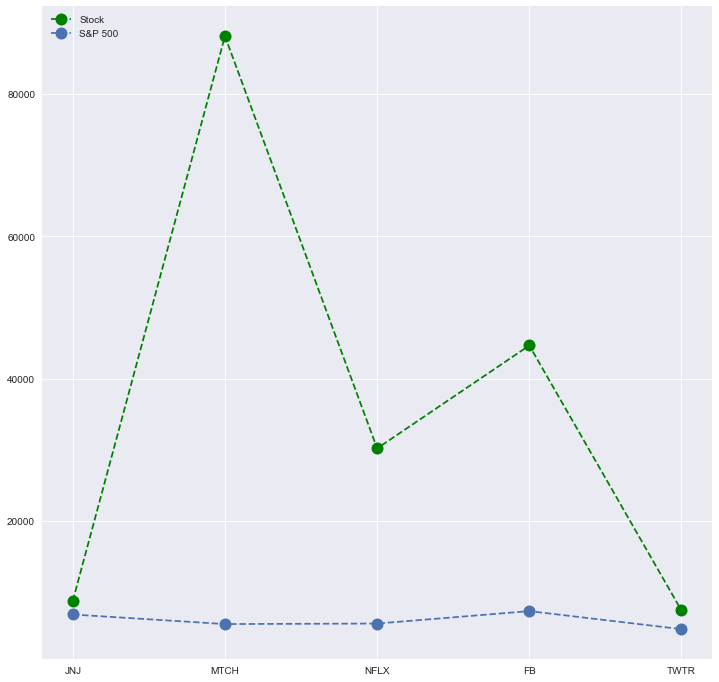

In [176]:
plt.figure(figsize= (12,12))
plt.plot(data['Stock Gain / (Loss)'], label='Stock', color='green', linestyle='dashed', marker='o', markersize='12')
plt.plot(data.Ticker, data['SP 500 Gain / (Loss)'], label='S&P 500', linestyle='dashed', marker='o', markersize='12')
plt.legend(loc='upper left')
plt.xticks(data.Ticker)
plt.show